In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [10]:
data_train_path = "Desktop/Fruits_Vegetables/Fruits_Vegetables/train"
data_test_path = "Desktop/Fruits_Vegetables/Fruits_Vegetables/test"
data_val_path  ="Desktop/Fruits_Vegetables/Fruits_Vegetables/validation"

In [11]:
#görsellerimin boyutlarını ayarlıyorum
img_width= 180
img_height=180


In [12]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False  
)

Found 3115 files belonging to 36 classes.


In [13]:
data_cat =data_train.class_names


In [14]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False)

Found 359 files belonging to 36 classes.


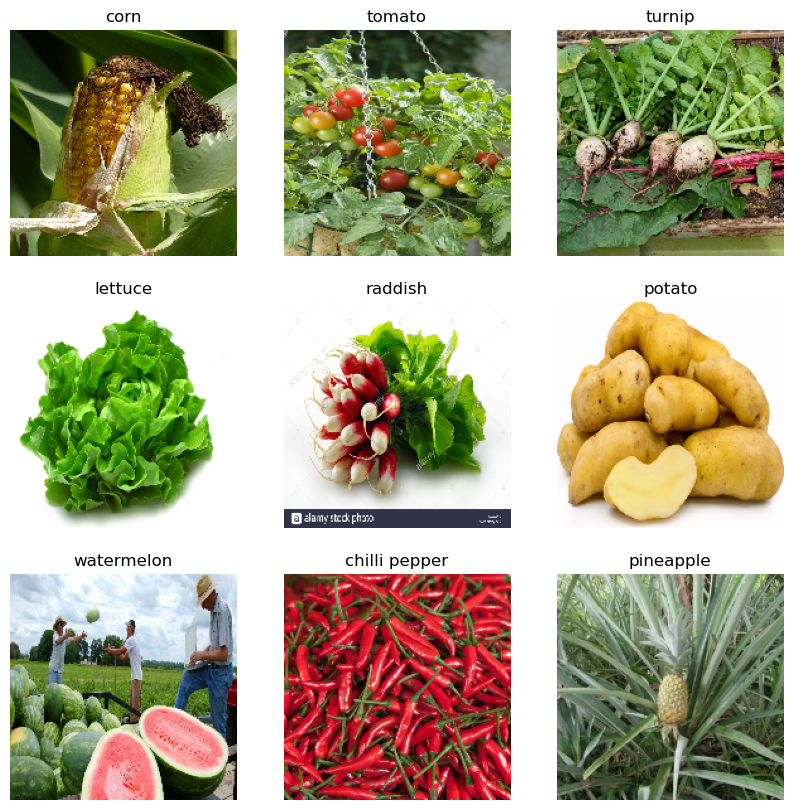

In [20]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

In [30]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),    
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat) )
])

#modeli oluşturdum

In [31]:
#model derleme
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [32]:
epochs_size = 25
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.0603 - loss: 3.8403 - val_accuracy: 0.3219 - val_loss: 2.4854
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.2488 - loss: 2.6625 - val_accuracy: 0.5100 - val_loss: 1.7541
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.4149 - loss: 2.0955 - val_accuracy: 0.7208 - val_loss: 1.0146
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.5867 - loss: 1.4228 - val_accuracy: 0.8689 - val_loss: 0.5653
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.7539 - loss: 0.8647 - val_accuracy: 0.8889 - val_loss: 0.5151
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.8493 - loss: 0.5256 - val_accuracy: 0.9231 - val_loss: 0.4017
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9241 - loss: 0.2963 - val_accuracy: 0.9202 - val_loss: 0.4405
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9298 - loss: 0.2642 - val_accu

Text(0.5, 1.0, 'Loss')

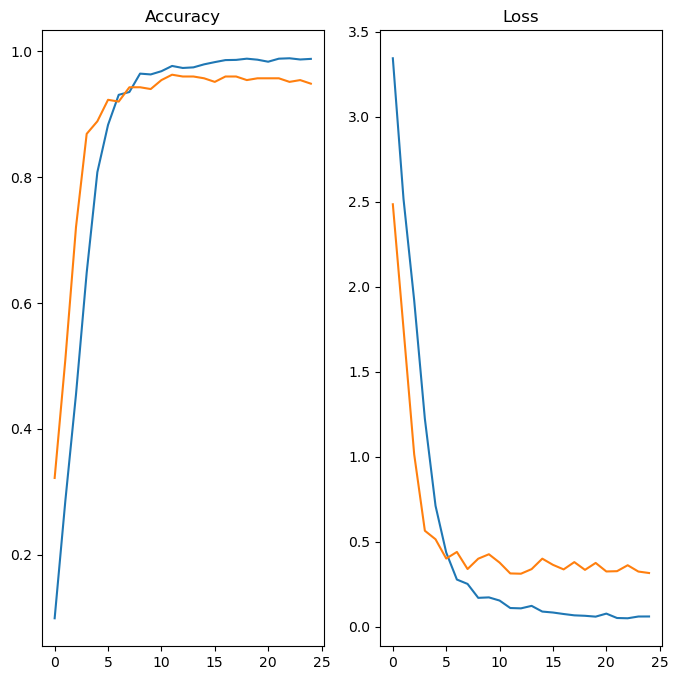

In [34]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')